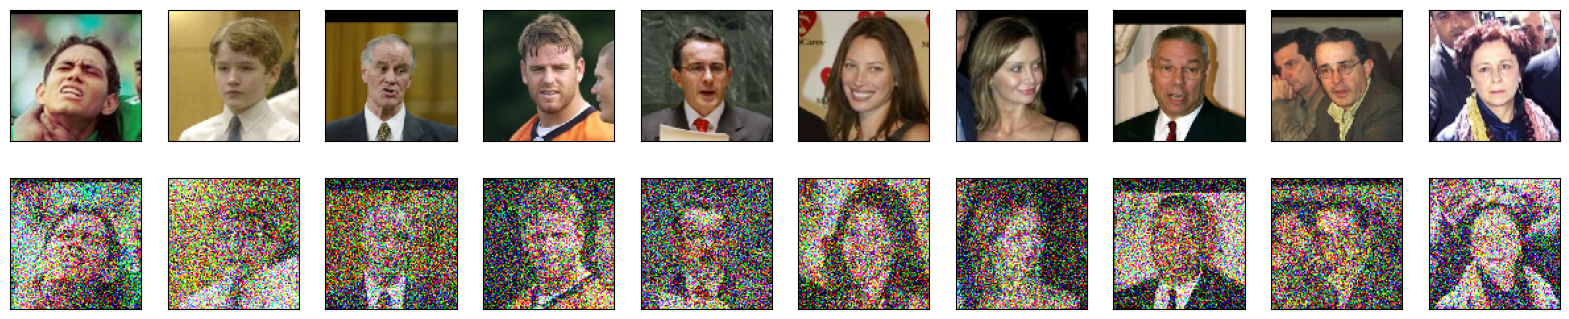

In [7]:
#Array, image processing
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Model Operation
from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
#io
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

import_dataset = glob.glob('./Dataset/*/*.jpg')
imgs = [img_to_array(load_img(fname, target_size=(100, 100))) for fname in import_dataset]

imgs = np.array(imgs)
imgs = imgs / 255.0

train_x, test_x = train_test_split(imgs, test_size=0.3, random_state=42)
train_x, val_x = train_test_split(train_x, test_size=0.2, random_state=42)

noise_mean = 0
noise_std = 0.5
noise_factor = 1.0

train_x_noise = train_x + noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=train_x.shape)
val_x_noise = val_x + noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=val_x.shape)
test_x_noise = test_x + noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=test_x.shape)

train_x_noise = np.clip(train_x_noise, 0., 1.)
val_x_noise = np.clip(val_x_noise, 0., 1.)
test_x_noise = np.clip(test_x_noise, 0., 1.)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_x[i].reshape(100, 100, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_x_noise[i].reshape(100, 100, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
